In [38]:
from mpmath import *
import matplotlib.pyplot as plt

In [31]:
def calc_J(chi, En, Lz, Q, aa, slr, ecc, x):
    a1 = (1 - ecc**2)*(1 - En**2)
    b1 = 2*(1 - En**2 - (1 - ecc**2)/slr)
    c1 = (((3 + ecc**2)*(1 - En**2))/(1 - ecc**2) - 4/slr + 
          ((1 - ecc**2)*(aa**2*(1 - En**2) + Lz**2 + Q))/slr**2)

    eta = 1 + ecc * cos(chi)

    return a1 + b1 * eta + c1 * eta**2

In [60]:
def wr_analytic(psi, ups_r, En, Lz, Q, aa, slr, ecc, x):
    a1 = (1 - ecc**2)*(1 - En**2)
    b1 = 2*(1 - En**2 - (1 - ecc**2)/slr)
    c1 = (((3 + ecc**2)*(1 - En**2))/(1 - ecc**2) - 4/slr + 
          ((1 - ecc**2)*(aa**2*(1 - En**2) + Lz**2 + Q))/slr**2)

    return ((-2j*(1 - ecc**2)*ups_r*cos(psi/2.)**2*
        ellipf(j*asinh(sqrt((a1 - (-1 + ecc)*(b1 + c1 - c1*ecc))/
              (a1 + b1 + c1 - c1*ecc**2 + sqrt((b1**2 - 4*a1*c1)*ecc**2)))*tan(psi/2.)),
         (a1 + b1 + c1 - c1*ecc**2 + sqrt((b1**2 - 4*a1*c1)*ecc**2))/
          (a1 + b1 + c1 - c1*ecc**2 - sqrt((b1**2 - 4*a1*c1)*ecc**2)))*
        sqrt(2 + (2*(a1 - (-1 + ecc)*(b1 + c1 - c1*ecc))*tan(psi/2.)**2)/
           (a1 + b1 + c1 - c1*ecc**2 - sqrt((b1**2 - 4*a1*c1)*ecc**2)))*
        sqrt(1 + ((a1 - (-1 + ecc)*(b1 + c1 - c1*ecc))*tan(psi/2.)**2)/
           (a1 + b1 + c1 - c1*ecc**2 + sqrt((b1**2 - 4*a1*c1)*ecc**2))))/
      (sqrt((a1 - (-1 + ecc)*(b1 + c1 - c1*ecc))/
          (a1 + b1 + c1 - c1*ecc**2 + sqrt((b1**2 - 4*a1*c1)*ecc**2)))*slr*
        sqrt(2*a1 + 2*b1 + 2*c1 + c1*ecc**2 + 2*(b1 + 2*c1)*ecc*cos(psi) + c1*ecc**2*cos(2*psi))))

In [50]:
def wr_integrate(psi, ups_r, En, Lz, Q, aa, slr, ecc, x):
    def J_integrand(chi):
        return ups_r / sqrt(calc_J(chi, En, Lz, Q, aa, slr, ecc, x))
    return (1 - ecc**2) / slr * quadgl(J_integrand, [0, psi])

In [51]:
mp.prec = 300

In [52]:
psi_arr = linspace(0, pi, 1000)

In [53]:
aa = mpf("0.9")
slr = mpf("6")
ecc = mpf("0.3")
x = mpf("0.5")

En = mpf("0.9347421553168186838302389692927060793488727380688638477038")
Lz = mpf("1.53133514084463573761390681571977408093643779466618827199")
Q = mpf("7.11166313087423467812941730029360145839740012711046203933")

ups_r = mpf("1.7063576667428898533809007865770508586227900453771052054")

wr_arr = []
for i in range(len(psi_arr)):
    psi = psi_arr[i]
    wr_arr.append(wr_integrate(psi, ups_r, En, Lz, Q, aa, slr, ecc, x))



In [61]:

wr_arr2 = []
for i in range(len(psi_arr)):
    psi = psi_arr[i]
    wr_arr2.append(wr_analytic(psi, ups_r, En, Lz, Q, aa, slr, ecc, x).real)

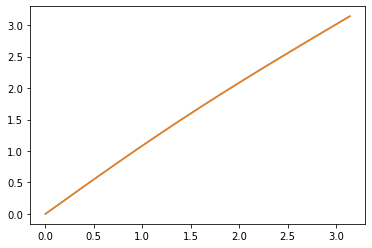

In [62]:
plt.plot(psi_arr, wr_arr)
plt.plot(psi_arr, wr_arr2)

In [63]:
diff = []
for i in range(len(wr_arr)):
    diff.append(wr_arr[i] - wr_arr2[i])


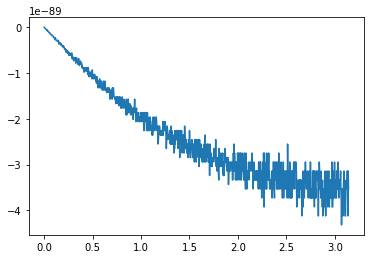

In [64]:
plt.plot(psi_arr, diff)